In [50]:
# 2.1.0 - Feature engineering BMI

#Data loading
import pandas as pd
cardioData= pd.read_csv('./Data/cardio_train.csv', sep=';')
cardioData.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [51]:
#a)

cardioData = cardioData.drop(cardioData[cardioData.height < 150].index)
cardioData = cardioData.drop(cardioData[cardioData.height > 220].index)
cardioData = cardioData.drop(cardioData[cardioData.weight < 40].index)
cardioData = cardioData.drop(cardioData[cardioData.height > 200].index)
cardioData["BMI"] = cardioData["weight"] / (cardioData["height"]/100)**2
cardioData = cardioData.drop(cardioData[cardioData.BMI < 15].index)
cardioData = cardioData.drop(cardioData[cardioData.BMI > 45].index)
len(cardioData)


67946

<AxesSubplot:xlabel='weight', ylabel='height'>

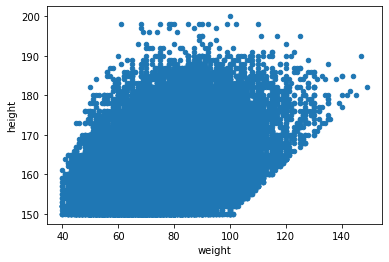

In [52]:
#new scatter plot after dropping rows
cardioData.plot.scatter("weight", "height")

In [53]:
# BMI range from https://www.cdc.gov/obesity/adult/defining.html
#If your BMI is 18.5 to <25, it falls within the healthy weight range.
#If your BMI is 25.0 to <30, it falls within the overweight range.
#Class 1: BMI of 30 to < 35
#Class 2: BMI of 35 to < 40
#Class 3: BMI of 40 or higher. 

#code example is taken from https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
import numpy as np


conditions = [
    (cardioData['BMI'] <= 18.5),
    (cardioData['BMI'] > 18.5) & (cardioData['BMI'] <= 25),
    (cardioData['BMI'] > 25) & (cardioData['BMI'] <= 30),
    (cardioData['BMI'] > 30) & (cardioData['BMI'] <= 35),
    (cardioData['BMI'] > 35) & (cardioData['BMI'] <= 40),
    (cardioData['BMI'] > 40)
    ]

values = ['Underweight','Normal range', 'Overweight', 'Obese(Class1)', 'Obese(Class2)', 'Obese(Class3)']

cardioData['BMI_Range'] = np.select(conditions, values)
cardioData


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_Range
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese(Class1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,Overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese(Class1)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


## 2.1.1 Feature engineering blodtryck

In [54]:
#a)
cardioData = cardioData.drop(cardioData[cardioData.ap_hi < 70].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_hi > 230].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_lo < 50].index)
cardioData = cardioData.drop(cardioData[cardioData.ap_lo > 160].index)
len(cardioData)

66740

In [55]:
conditions2 = [
    (cardioData['ap_lo'] < 80) & (cardioData['ap_hi'] < 120),
    (cardioData['ap_hi'] >= 120) & (cardioData['ap_hi'] <= 129) & (cardioData['ap_lo'] < 80),
    (cardioData['ap_lo'] >= 80) & (cardioData['ap_lo'] <= 89) , (cardioData['ap_hi'] > 129) & (cardioData['ap_hi'] <= 139),
    (cardioData['ap_lo'] > 89) & (cardioData['ap_lo'] <= 119) , (cardioData['ap_hi'] > 139) & (cardioData['ap_hi'] <= 180),
    (cardioData['ap_lo'] > 180), (cardioData['ap_hi'] > 120), 
    ]

values2 = ['Healthy','Elevated', 'Stage 1 Hypertension', 'Stage 1 Hypertension', 'Stage 2 Hypertension', 'Stage 2 Hypertension', 'Hypertension crisis', 'Hypertension crisis']
cardioData['AP_categories'] = np.select(conditions2, values2)
cardioData['AP_categories']

0        Stage 1 Hypertension
1        Stage 2 Hypertension
2        Stage 1 Hypertension
3        Stage 2 Hypertension
4                     Healthy
                 ...         
69994    Stage 1 Hypertension
69995    Stage 1 Hypertension
69997    Stage 2 Hypertension
69998    Stage 1 Hypertension
69999    Stage 1 Hypertension
Name: AP_categories, Length: 66740, dtype: object

### Visualiseringar antal sjukdomar

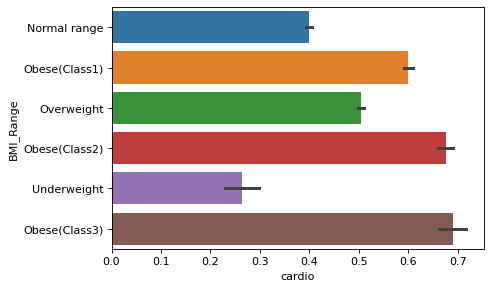

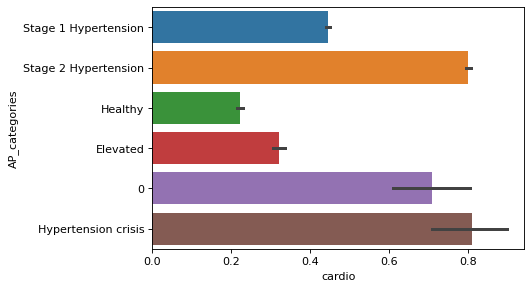

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
#plot_cardio_data = cardioData[cardioData["cardio"]==1]
plot_list = ["BMI_Range","AP_categories"]


for i in range(len(plot_list)):
    fig, ax = plt.subplots(dpi=80)
    sns.barplot(x = cardioData["cardio"], y = cardioData[plot_list[i]])

## Visualiseringar korrelation

### Nedan Heatmap visar korrelation mellan olika features. Följande har korrelationer:

- Högt blodtryck och kardiovaskulär sjukdom, vilket är naturligt då vi vet att högt blodtryck är farligt och kan leda till just det. 
- Höga kolesterolvärden kardiovaskulär sjukdom, samma svar på varför som ovan.
- Ålder / BMI och kardiovaskulär sjukdom har små korrelattioner, vi vet att detta är riskfaktorer också.
- Rökning och alkohol korrelerar, båda är droger och är man öppen för att inta den ena så ökar risken att man är det även för den andra.
- Glukos och höga kolesterolvärden, båda är kopplad till dålig kost. Mycket socker i dieten ökar glukosvärden och mycket (dåligt) fett ökar kolesterol.
- Längd och kön samt vikt och kön, män är både längre och väger mer än kvinnor så denna korrelation är helt naturlig.

- Vikt och BMI, vilket inte är så konstigt då BMI är beroende av vikt i sin uträkning.
- Längd och BMI är negativt korrelerade, vilket inte är så konstigt då BMI är beroende av längd i sin uträkning.


<AxesSubplot:>

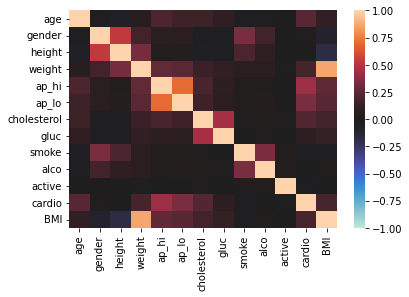

In [57]:
cardioDataHeatMap =cardioData.drop("id", axis=1)
sns.heatmap(cardioDataHeatMap.corr(), vmin = -1, vmax= 1, annot=False, center = 0)

## 2.3 Skapa två dataset

In [58]:
df1=cardioData.drop(["id","ap_hi", "ap_lo", "weight", "height", "BMI" ],axis=1)
df2=cardioData.drop(["id","height","weight", "BMI_Range", "AP_categories"],axis=1)

df1_encoded = pd.get_dummies(df1, drop_first=True)
df2_encoded= pd.get_dummies(df2, drop_first=True)
df1_encoded

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI_Range_Obese(Class1),BMI_Range_Obese(Class2),BMI_Range_Obese(Class3),BMI_Range_Overweight,BMI_Range_Underweight,AP_categories_Elevated,AP_categories_Healthy,AP_categories_Hypertension crisis,AP_categories_Stage 1 Hypertension,AP_categories_Stage 2 Hypertension
0,18393,2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,20228,1,3,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1
2,18857,1,3,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,17623,2,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1
4,17474,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,21074,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0
69995,19240,2,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0
69997,19066,2,3,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1
69998,22431,1,1,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0


## 2.4 Välja modell

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np


X,y = df1_encoded.drop("cardio", axis = 1), df1_encoded["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_val, X_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model_logistic = LogisticRegression()
model_logistic.fit(scaled_X_train, y_train)
model_logistic.coef_, model_logistic.intercept_
y_pred = model_logistic.predict(scaled_X_test)


In [74]:
pipeline_KNN = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])

pipeline_logistic = Pipeline([("scaler", StandardScaler()), ("logistic", LogisticRegression(
    solver = "saga", penalty="elasticnet", multi_class="ovr", max_iter = 1000
))])
# searching 33-35 since 34 gave the highest value of 0-45.
param_grid_KNN = {"knn__n_neighbors": list(range(33,36))}
param_grid_logistic = {"logistic__l1_ratio": np.linspace(0,1,6)}
param_grid_random_forest = {
    "n_estimators": [50, 100, 150,200, 250],
    "criterion": ["gini", "entropy"],
    "max_features": ["auto", "sqrt", "log2"],
}


#classifier_clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_random_forest, cv=5,verbose=2, scoring="recall")
classifier_KNN = GridSearchCV(estimator=pipeline_KNN, cv = 5, scoring = "accuracy", verbose=2, param_grid=param_grid_KNN)
#classifier_logistic = GridSearchCV(estimator = pipeline_logistic, cv = 5, scoring = "accuracy", verbose=2, param_grid=param_grid_logistic)
#classifier_clf.fit(X_train, y_train)
classifier_KNN.fit(X_train, y_train)
#classifier_logistic.fit(X_train, y_train)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END ................................knn__n_neighbors=33; total time=   9.7s
[CV] END ................................knn__n_neighbors=33; total time=   6.7s
[CV] END ................................knn__n_neighbors=33; total time=   6.0s
[CV] END ................................knn__n_neighbors=33; total time=   6.4s
[CV] END ................................knn__n_neighbors=33; total time=   6.6s
[CV] END ................................knn__n_neighbors=34; total time=   7.2s
[CV] END ................................knn__n_neighbors=34; total time=   7.0s
[CV] END ................................knn__n_neighbors=34; total time=   6.3s
[CV] END ................................knn__n_neighbors=34; total time=   6.8s
[CV] END ................................knn__n_neighbors=34; total time=   7.1s
[CV] END ................................knn__n_neighbors=35; total time=   6.7s
[CV] END ................................knn__n_n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [33, 34, 35]}, scoring='accuracy',
             verbose=2)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62     10170
           1       0.61      0.61      0.61      9852

    accuracy                           0.62     20022
   macro avg       0.62      0.62      0.62     20022
weighted avg       0.62      0.62      0.62     20022



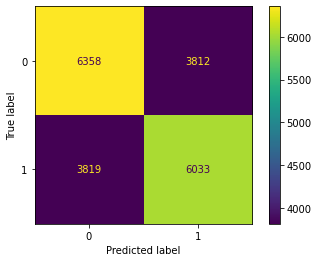

In [63]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
y_pred = classifier_clf.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10170
           1       0.71      0.65      0.68      9852

    accuracy                           0.70     20022
   macro avg       0.70      0.70      0.70     20022
weighted avg       0.70      0.70      0.70     20022



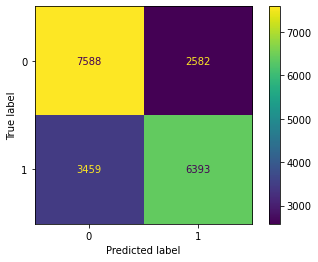

In [71]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
y_pred = classifier_KNN.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [72]:
classifier_KNN.best_params_

{'knn__n_neighbors': 55}

              precision    recall  f1-score   support

           0       0.68      0.77      0.73     10170
           1       0.73      0.63      0.68      9852

    accuracy                           0.70     20022
   macro avg       0.71      0.70      0.70     20022
weighted avg       0.71      0.70      0.70     20022



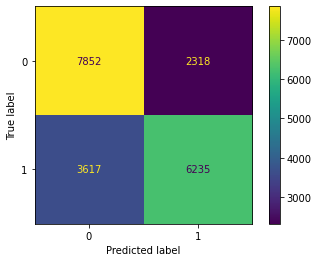

In [66]:
y_pred = classifier_logistic.predict(X_test)

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

C:\Users\fredr\.virtualenvs\Maskininl-rning-Fredrik-Hegardt-mmrJtyaC\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.67      0.49      0.57     10170
           1       0.59      0.75      0.66      9852

    accuracy                           0.62     20022
   macro avg       0.63      0.62      0.62     20022
weighted avg       0.63      0.62      0.62     20022



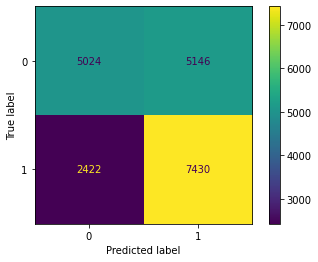

In [79]:
from sklearn.ensemble import VotingClassifier

vote_model = VotingClassifier([
    ("logistic", LogisticRegression(l1_ratio=0, solver = "saga", penalty="elasticnet", multi_class="ovr", max_iter = 1000)),
    ("Kneighbor", KNeighborsClassifier(n_neighbors=34)),
    ("random_forest", RandomForestClassifier(n_estimators = 200, criterion="gini", max_features="auto")),
])

vote_model.fit(X_train, y_train)
y_pred = vote_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [67]:
import joblib
import pandas as pd
mysample = df1_encoded.drop("cardio", axis = 1)
random_sample = mysample.sample(100, random_state= 1337).to_csv("test_samples.csv")
joblib.dump(classifier_KNN, filename= "KNN_model.pkl")



['KNN_model.pkl']